In [24]:
df=pd.read_csv('C:\\documents\\study material\\data science\\Machine learning udemy notes\\DATA\\wine_fraud.csv')

df.head()

<IPython.core.display.Javascript object>

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [2]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


<IPython.core.display.Javascript object>

C:\Users\njjanaki\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


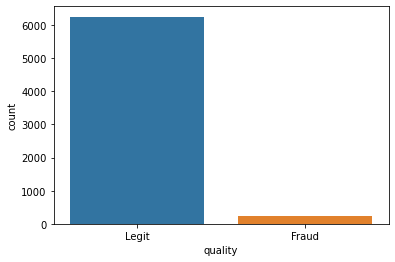

In [6]:
sns.countplot('quality',data=df);

In [8]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<IPython.core.display.Javascript object>

C:\Users\njjanaki\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

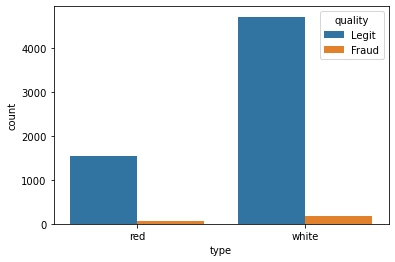

In [9]:
sns.countplot('type',data=df,hue='quality')

In [20]:
100*len(df[(df['type']=='red')&(df['quality']=='Fraud')])/len(df[df['type']=='red'])

3.9399624765478425

In [15]:
len(df[(df['type']=='red')&(df['quality']=='Fraud')])

63

In [21]:
len(df[df['type']=='red'])

1599

In [22]:
100*len(df[(df['type']=='white')&(df['quality']=='Fraud')])/len(df[df['type']=='white'])

3.736218864842793

In [27]:
df['target']=df['quality'].map({'Legit':0,'Fraud':1})


In [31]:
df.corr()['target']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
target                  1.000000
Name: target, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:>

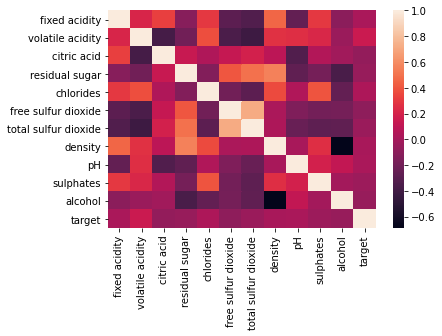

In [29]:
sns.heatmap(df.corr())

In [52]:
x=pd.Series(df.corr()['target'].values,index=df.corr()['target'].index)
y=x.drop('target',axis=0).sort_values()
y

<IPython.core.display.Javascript object>

free sulfur dioxide    -0.085204
citric acid            -0.061789
alcohol                -0.051141
residual sugar         -0.048756
total sulfur dioxide   -0.035252
sulphates              -0.034046
density                 0.016351
pH                      0.020107
fixed acidity           0.021794
chlorides               0.034499
volatile acidity        0.151228
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, '90')

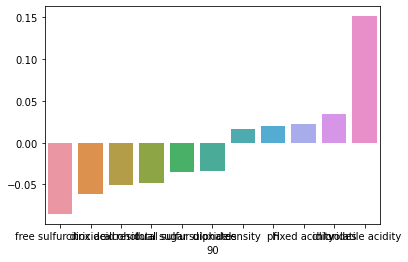

In [54]:
sns.barplot(x=y.index,y=y.values)
plt.

In [ ]:
sns.clustermap(df.corr(),cmap='viridis')

In [25]:
df['type']=df['type'].map({'red':0,'white':1})

In [26]:
X=df.drop('quality',axis=1)
y=df['quality']

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [29]:
scaler=StandardScaler()

In [30]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [38]:
model=SVC(class_weight='balanced')

In [39]:
param_grid={'C':[0.001,0.01,0.1,0.5,1],
              'gamma':['scale','auto']}

In [40]:
grid=GridSearchCV(model,param_grid,cv=6)

In [41]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(cv=6, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [42]:
y_pred=grid.predict(scaled_X_test)

In [43]:
from sklearn.metrics import confusion_matrix,classification_report

In [44]:
confusion_matrix(y_test,y_pred)

array([[ 17,  10],
       [ 92, 531]], dtype=int64)

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       Fraud       0.16      0.63      0.25        27
       Legit       0.98      0.85      0.91       623

    accuracy                           0.84       650
   macro avg       0.57      0.74      0.58       650
weighted avg       0.95      0.84      0.88       650

